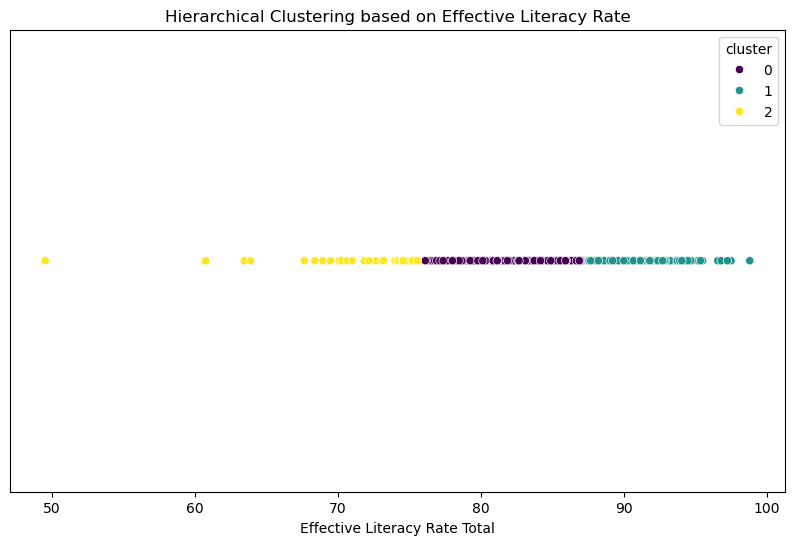

   name_of_city  effective_literacy_rate_total  cluster
0             0                          79.86        0
1             1                          91.99        1
2             2                          80.51        0
3             3                          83.46        0
4             4                          68.38        2


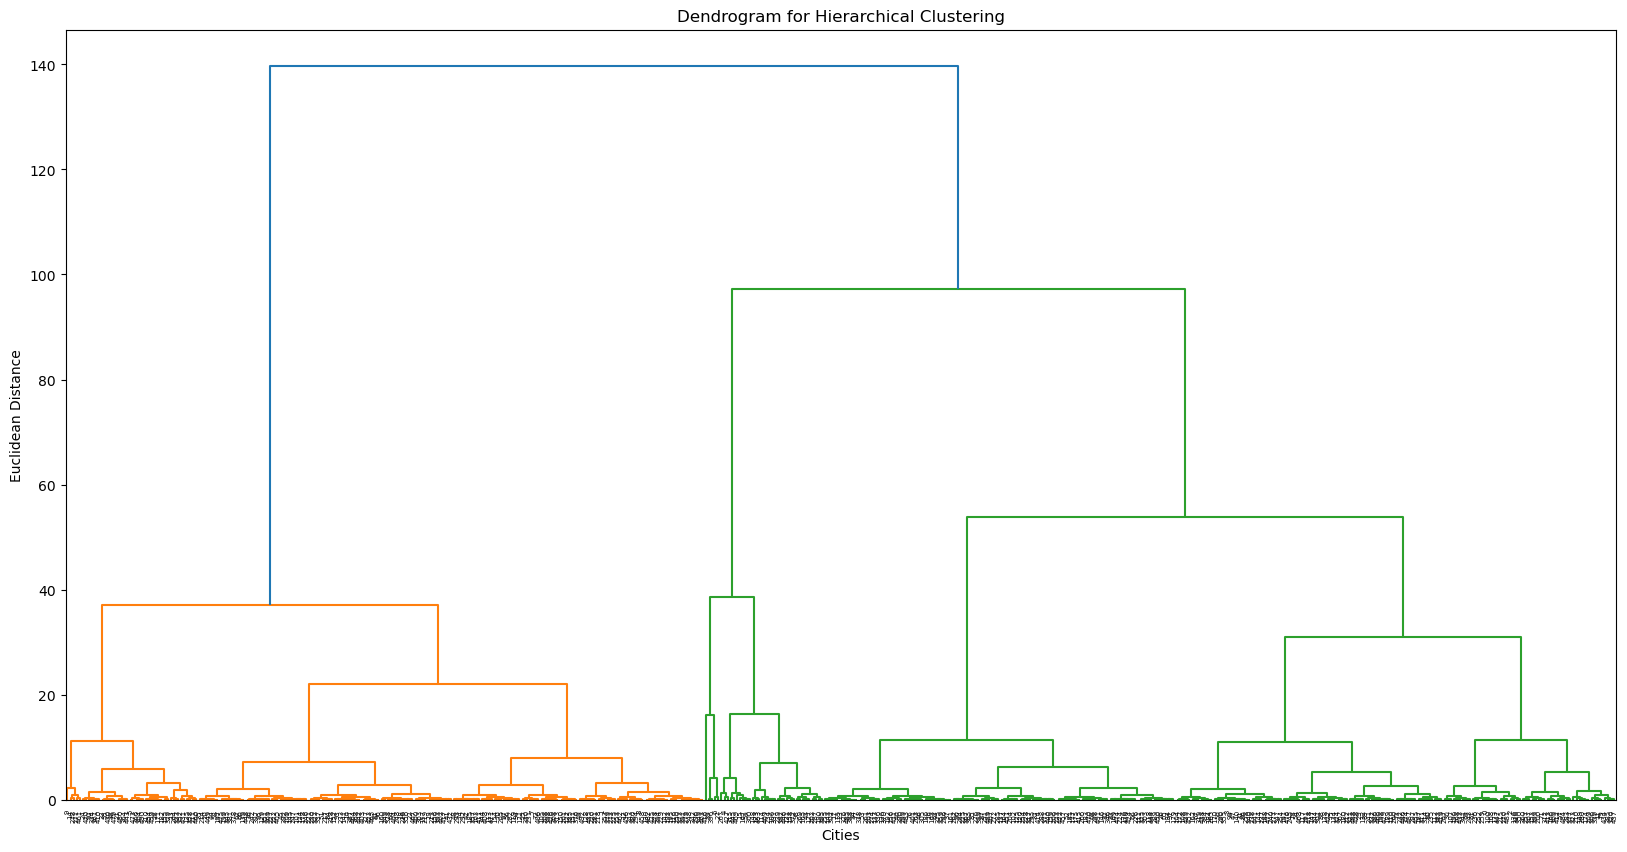

In [4]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
# Change the dataset path to its exact path
df = pd.read_csv('./Datasets/cities_r2.csv')

# Step 2: Data Preprocessing
# Handle missing values for numeric columns by filling with the mean
numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Handle missing values for categorical columns by filling with the mode
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)  # Fill with the mode for categorical columns

# Step 3: Data Transformation
# Label Encoding for categorical columns
label_encoder = LabelEncoder()
for col in categorical_cols:
  df[col] = label_encoder.fit_transform(df[col])


# Step 4: Apply Hierarchical Clustering based on 'effective_literacy_rate_total'
X = df[['effective_literacy_rate_total']]  # Using 'effective_literacy_rate_total' for clustering

# Apply Agglomerative Hierarchical Clustering
hierarchical_clustering = AgglomerativeClustering(n_clusters=3)  # Assuming 3 clusters
df['cluster'] = hierarchical_clustering.fit_predict(X)

# Step 5: Visualizing the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['effective_literacy_rate_total'], y=[0] * len(df), hue=df['cluster'], palette='viridis')
plt.title('Hierarchical Clustering based on Effective Literacy Rate')
plt.xlabel('Effective Literacy Rate Total')
plt.yticks([])
plt.show()

# Step 6: View the grouped data
print(df[['name_of_city', 'effective_literacy_rate_total', 'cluster']].head())

import scipy.cluster.hierarchy as sch

# Create the linkage matrix
linkage_matrix = sch.linkage(X, method='ward')

# Plot the dendrogram
plt.figure(figsize=(20, 10))
sch.dendrogram(linkage_matrix)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Cities')
plt.ylabel('Euclidean Distance')
plt.show()
